<a href="https://colab.research.google.com/github/VaidyAlagappan/AsyncFileLogger/blob/master/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.1 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/GreatLearning/FoodHub/foodhub_order.csv')


In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the given dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1.   We have columns with Integers (order_id, customer_id, food_preparation_time, delivery_time), Strings(restaurant_name, cuisine_type, day_of_the_week, rating) and Floats(cost_of_the_order).  All of them have data in it.
2.   Column "rating" should be converted to an Integer for calculations.   


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the given dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

1.   Minimum time taken to prepare food is 20 minutes.
2.   Average time taken to prepare food is 27.37 minutes.
3.   Maximum time taken to prepare food is 35 minutes.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
#df['rating'].unique();
#df['rating'].value_counts()['Not given']
mask=pd.to_numeric(df['rating'],errors='coerce').isnull()
df[mask].shape[0]


736

#### Observations:
There are 736 orders that are not rated in the given dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

6-A Histograms

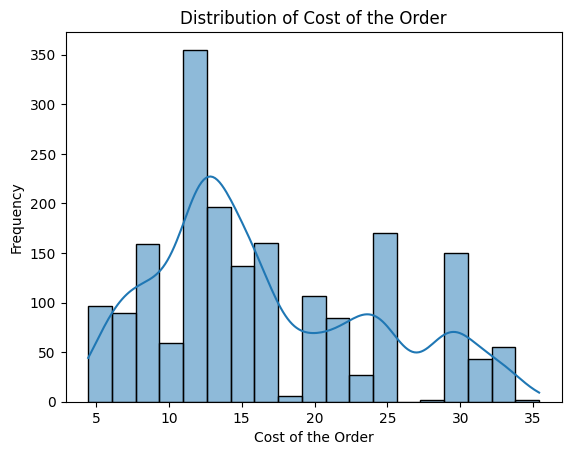

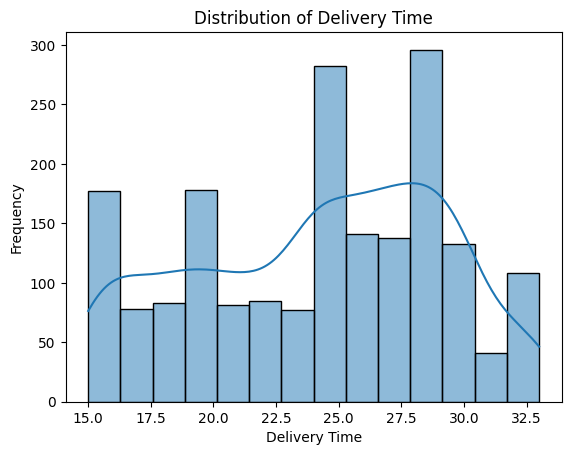

In [ ]:
# Write the code here

#histograms are used for visualizing the distribution of a single numerical variable.
#'cost_of_the_order' and 'delivery_time' are good candidates for Histograms
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
sns.histplot(df['cost_of_the_order'], kde=True)
plt.show()

plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
sns.histplot(df['delivery_time'], kde=True)
plt.show()


Observations:

1.   Most of the orders are between $10 and $15
2.   Most of the orders took around 25 to 28 minutes minutes



6-B Box Plots

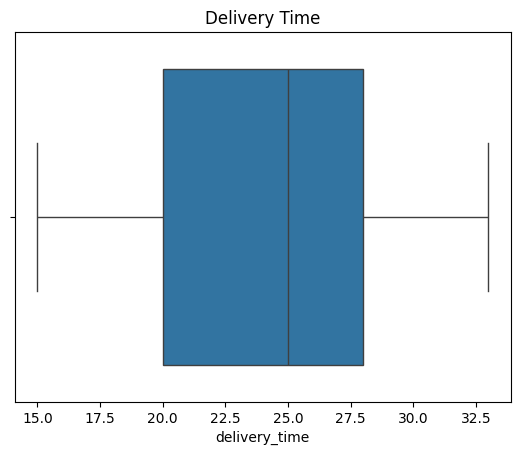

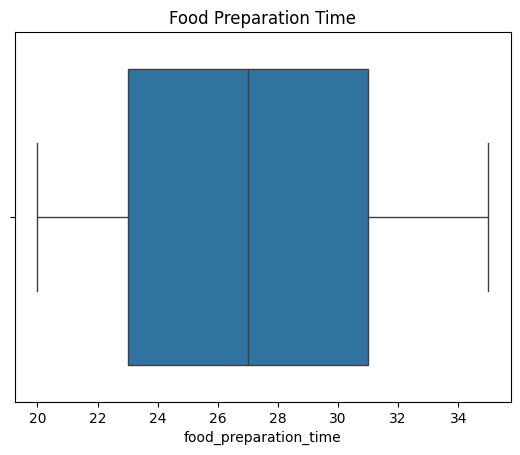

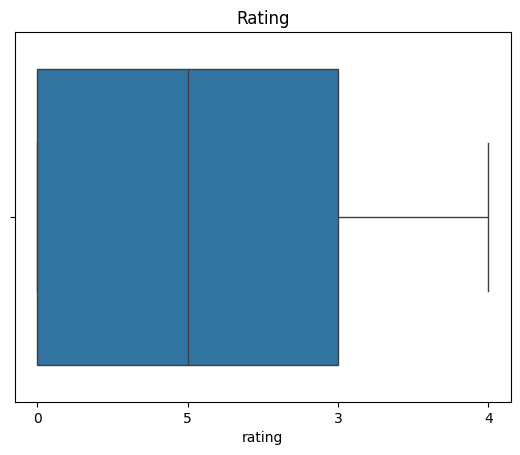

In [ ]:
#BoxPlot
#Box plots excel at visualizing the distribution of a numerical variable
#across different categories

plt.title('Delivery Time')
sns.boxplot(x=df['delivery_time'])
plt.show()

plt.title('Food Preparation Time')
sns.boxplot(x=df['food_preparation_time'])
plt.show()

df.replace('Not given', '0', inplace=True)
plt.title('Rating')
sns.boxplot(x=df['rating'])
plt.show()


Observations:
* Delivery Time
  * Median delivery time is 25 minutes to deliver the food
  * The box shows 50% (between 25% and 75%) of the deliveries take between 20 and 28 minutes
  * The whiskers shows that the range is between 15 and 33 minutes for delivery of food
  * no outliers
* Food Preperation Time
  * Median preparation time is 28 minutes
  * Box shows that 50% of the preperation time is between 24 and 30 minutes
  * Whiskers indicate the minimum and maximum time, which is 20 to 34 minutes
  * No outliers
* Rating

  * Median rating is 3
  * Many ratings fall between 3 and 4
  * No outliers

6-C Count Plots

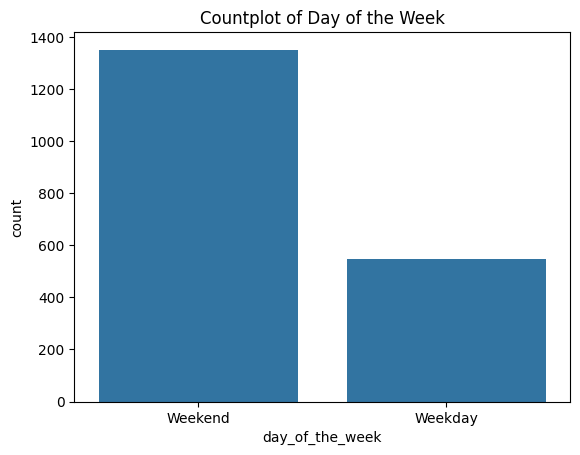

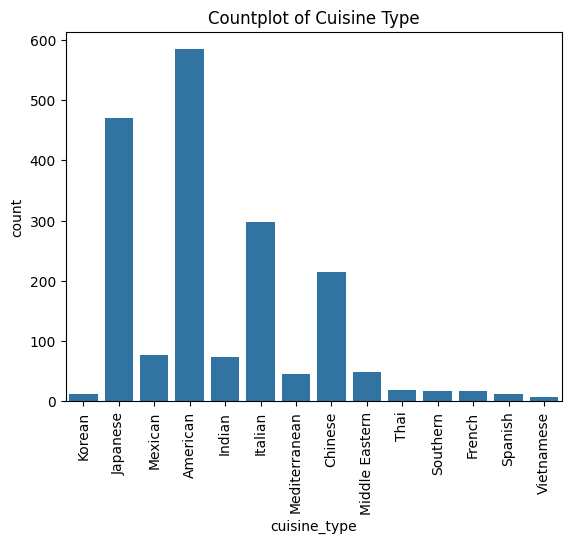

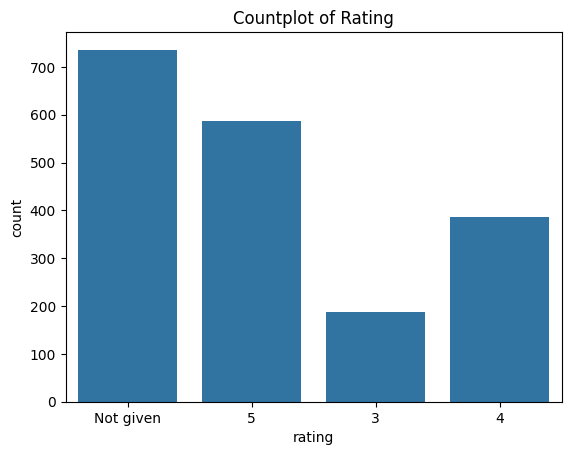

In [ ]:
#Count plots are ideal for showing the number of observations in each category of a categorical variable
sns.countplot(x='day_of_the_week', data=df)
plt.title('Countplot of Day of the Week')
plt.show()

sns.countplot(x='cuisine_type', data=df)
plt.title('Countplot of Cuisine Type')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='rating', data=df)
plt.title('Countplot of Rating')
plt.show()

Observations:

1.   More orders are made over the weekend
2.   Most ordered food is American.  Least ordered food is Vietnamese.
3.   Many people have not given rating.  Very few people have given 3 as rating.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
from os import rename
# Write the code here
result=df['restaurant_name'].value_counts().head()
result=result.reset_index()
result.columns=['Restaurant Name','Number of Orders']
print(result)





             Restaurant Name  Number of Orders
0                Shake Shack               219
1          The Meatball Shop               132
2          Blue Ribbon Sushi               119
3  Blue Ribbon Fried Chicken                96
4                       Parm                68


#### Observations:
Based on maximum number of orders received by the top 5 restaurant, we have
1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
Cuisines=df.groupby(['cuisine_type','day_of_the_week'])['order_id'].count().sort_values(ascending=False)
WeekendFilter=Cuisines.index.get_level_values('day_of_the_week')=='Weekend'
Cuisines=Cuisines[WeekendFilter].index[0][0]
print (Cuisines)

American


#### Observations:
Most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
TotalOrders=df['cost_of_the_order'].count()
OrdersGreaterThan20=df['cost_of_the_order']>20
SumOfOrdersGreaterThan20=OrdersGreaterThan20.sum()
PercentageOfOrdersGreaterThan20=(SumOfOrdersGreaterThan20/TotalOrders)*100
print(PercentageOfOrdersGreaterThan20)

29.24130663856691


#### Observations:
Totally there are 29% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
result=df['customer_id'].value_counts().head(3)
result=result.reset_index()
result.columns=['Customer ID','Number of Orders']
print(result)

   Customer ID  Number of Orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:
Identified top 3 frequent customers based on the number of orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


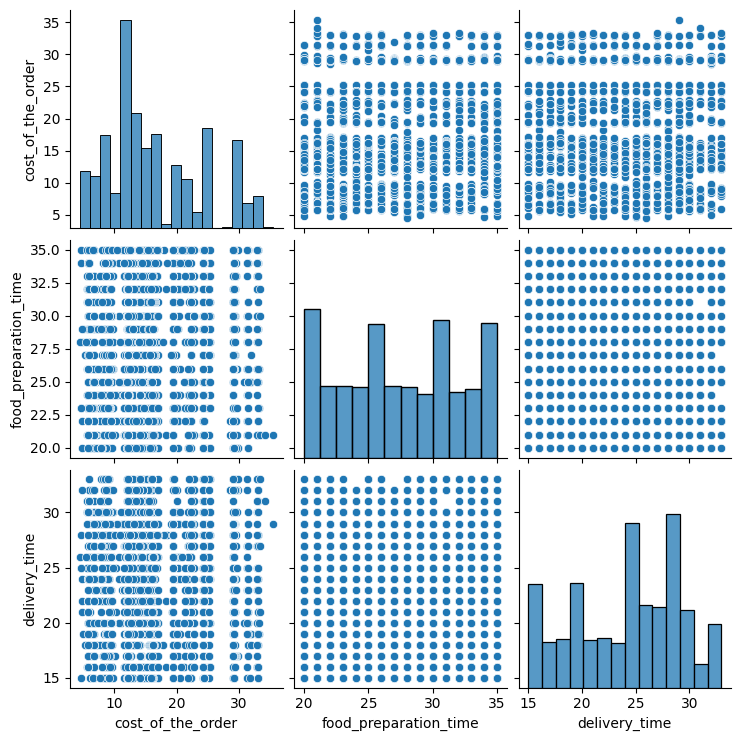

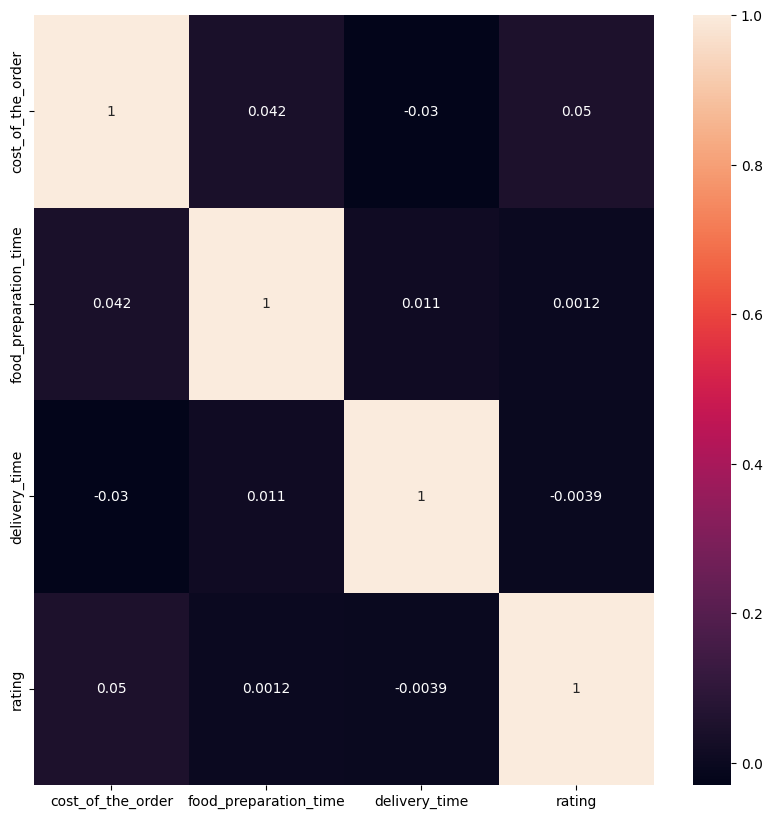

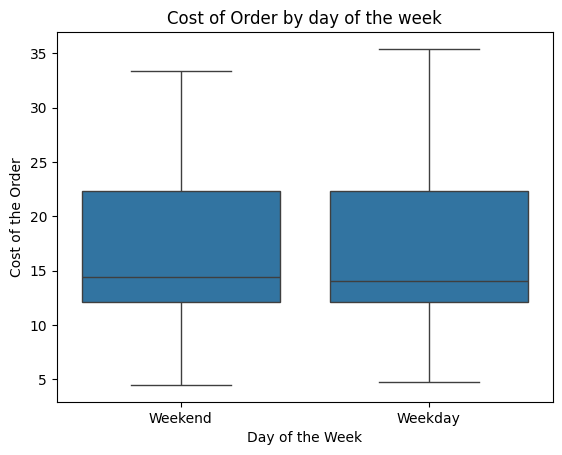

Median: 14.14
Standard Deviation: 7.48


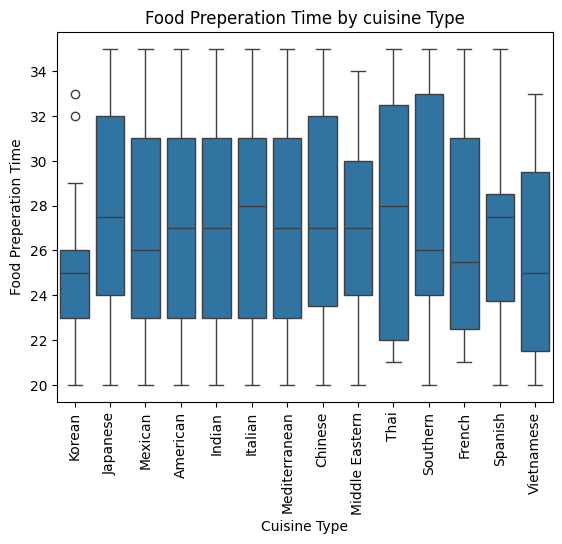

Median: 27.0
Standard Deviation: 4.63


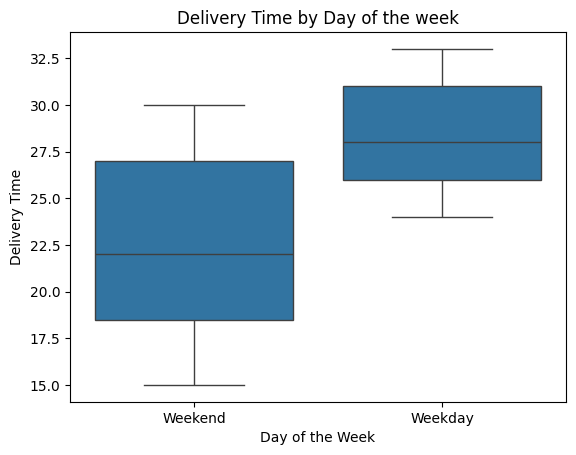

Median: 25.0
Standard Deviation: 4.97


In [ ]:
#explore relationship between numerical variables
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time','rating']])
plt.show()

plt.figure(figsize=(10,10))
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time','rating']].corr(), annot=True)
plt.show()

plt.title('Cost of Order by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
sns.boxplot(x=df['day_of_the_week'],y=df['cost_of_the_order'])
plt.show()
print('Median:',round(df['cost_of_the_order'].median(),2))
print('Standard Deviation:',round(df['cost_of_the_order'].std(),2))

plt.title('Food Preperation Time by cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preperation Time')
plt.xticks(rotation=90)
sns.boxplot(x=df['cuisine_type'],y=df['food_preparation_time'])
plt.show()
print('Median:',round(df['food_preparation_time'].median(),2))
print('Standard Deviation:',round(df['food_preparation_time'].std(),2))


plt.title('Delivery Time by Day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
sns.boxplot(x=df['day_of_the_week'],y=df['delivery_time'])
plt.show()
print('Median:',round(df['delivery_time'].median(),2))
print('Standard Deviation:',round(df['delivery_time'].std(),2))




###Observations
* Cost of the Order by Day of the week
  * The median cost of the order is around $14
  * Weekends cost is right skewed for wider spread of hight costs of foods ordered

* Food preparation by cuisine type:
  * Korean food takes the least time to prepare. It has outliers too.
  * Looks like Thai cuisine has more varieties.
  * The median is around 27 minutes for preparing the food

* Delivery time by the day of the week:
  * The delivery time is lesser over the weekends compared to weekday
  * This should be due to traffic. This gives us oppurtunities to analyze on how to imporve the delivery time during weekdays.
  * The median is 25 minutes to deliver the food

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
#replace non numerical value to string '0'
df.replace('Not given', '0', inplace=True)
#df['rating'].unique()
#change the rating datatype to integer
df['rating']=df['rating'].astype(float)

#create data frame with restaurant_name and rating
df1=df[['restaurant_name','rating']]
df1=df1[df1['rating']>0]
#group by restaurant_name having number of ratings >50
df1=df1.groupby('restaurant_name').filter(lambda x: len(x)>50)
df2=df1.groupby('restaurant_name')['rating'].count()
df2=df2.reset_index()
df2.columns=['restaurant_name','number_of_ratings']
print (df2)
print('')
#Among the restaurants in df4, list the restaurants with average rating>4
df3=df1.groupby('restaurant_name')['rating'].mean()
df3=df3[df3>4]
df3=df3.reset_index()
df3.columns=['restaurant_name','rating']
print (df3)




             restaurant_name  number_of_ratings
0  Blue Ribbon Fried Chicken                 64
1          Blue Ribbon Sushi                 73
2                Shake Shack                133
3          The Meatball Shop                 84

             restaurant_name    rating
0  Blue Ribbon Fried Chicken  4.328125
1          Blue Ribbon Sushi  4.219178
2                Shake Shack  4.278195
3          The Meatball Shop  4.511905


#### Observations:


* Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop  
* There are 4 restaurants with average rating of more than 4.  
*   The same 4 restaurants have more than 50 ratings.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#Sum of orders having cost greater than 20
mask=df['cost_of_the_order']>20
sum_of_orders_greater_than_20=df[mask]['cost_of_the_order'].sum()
#Sum of orders having cost between 5 and 20
mask=(df['cost_of_the_order']>  5) & (df['cost_of_the_order']<=20)
sum_of_orders_greater_than_5=df[mask]['cost_of_the_order'].sum()
#Calculate total of order value
TotalSumOfOrders=sum_of_orders_greater_than_20+sum_of_orders_greater_than_5
#Calculate Net Revenue
NetRevenue=25/100*sum_of_orders_greater_than_20 + 15/100*sum_of_orders_greater_than_5
print('For orders worth ' + str(TotalSumOfOrders) + ', the Net Revenue is: '+str(NetRevenue))


For orders worth 31272.08, the Net Revenue is: 6166.303


#### Observations:


* The sum of cost of all the orders is USD 31,272.08
* The net revenue is calculated based on 25% on order above USD 20 and 15% based on orders greater than USD5 and lesser than USD 20
* The total revenue is USD 6166.30





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#total number of orders
total_orders=df['order_id'].count()
print('Total number of orders: '+str(total_orders))

#orders count above 60 minutes
orders_above_60_minutes=((df['food_preparation_time']+df['delivery_time'])>60).value_counts()[True]
print('Total number of orders above 60 minutes: '+ str(orders_above_60_minutes))

#percentage of orders above 60 minutes
Percentage=orders_above_60_minutes/total_orders*100
print('Percentage of orders above 60 minutes: '+str(round(Percentage,2))+'%')





Total number of orders: 1898
Total number of orders above 60 minutes: 200
Percentage of orders above 60 minutes: 10.54%


#### Observations:



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#mean delivery time of the orders on weekdays
mean_delivery_time_on_weekdays=df[df['day_of_the_week']!='Weekend']['delivery_time'].mean()
#print(mean_delivery_time_on_weekdays)
print('Mean delivery time on weekdays: '+str(round(mean_delivery_time_on_weekdays,2))+' minutes')
mean_delivery_time_on_weekends=df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
#print(mean_delivery_time_on_weekends)
print('Mean delivery time on weekends: '+str(round(mean_delivery_time_on_weekends,2))+' minutes')

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:


*   Average time taken to deliver food during weekday sis 28.34 minutes
*   Average time take to deliver food during weekends is 22.47
* This shows that we need to analyze and improve the delivery time for the weekends



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* With the given context, I would assume it as New York City(NYC) and NOT the New York State.
	* There are many restaurants in NYC.  According to Google Maps, there are around 49,000 restaurants in NYC.
	* There are 5 boroughs in NYC.  Manhattan (17,219), Brooklyn(15,603), Queens (9,806), Bronx(3,702), Staten Island(2,630).
	* As per 2023 stats, there are more than 4.7 million jobs.
* The dataset we have is for 178 restaurants.  Only tells us about the 1.9K orders from 1.2K customers between week day and weekends. The total cost of the order is 31,314.82
* The dataset does not tell us the date and time to understand the frequency of the orders. With the given context, I would assume that the given data is only for a month and concentrated only in Manhattan.  We also do not have the dataset for the number of people delivering the food.
* Taking the above mentioned assumptions, the business is doing pretty good and has a lot of opportunity to improve and grow.

### Recommendations:

* The app should be well advertised and grab more attention
	* It should grab attention of the restaurants and the individuals who order food
* Existing customers should be given coupons and discounts to use in future order
	* Coupons for feedbacks
* When there are many unsold items at the end of the day, then the restaurant owners should be given some options to give some discounts on the items.
* More the volume of sales, more revenue being generated
* Cuisine Types, Cost of the order and time to deliver all matters.
	* Adjust the cost of the order by Cuisine Type and delivery time




---

In [ ]:
#To convert your ipynb notebook to HTML, you’ll need to install the nbconvert package
!pip install nbconvert

In [ ]:
#Now that you have nbconvert installed, you can use it to convert your ipynb notebook to HTML
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/GreatLearning/FoodHub'

!jupyter nbconvert --to html Learner_Notebook_Full_Code.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GreatLearning/FoodHub
[NbConvertApp] Converting notebook Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 942817 bytes to Learner_Notebook_Full_Code.html
